In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [ ]:
%cd /content/drive/My\ Drive

/content/drive/My Drive


In [ ]:
print(tf.__version__)

2.7.0


In [ ]:
import tensorflow as tf
import tensorflow as ktf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten,GlobalMaxPooling2D, Dropout, MaxPooling2D,GlobalAveragePooling2D,BatchNormalization,concatenate,Input,Lambda
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import InceptionV3
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import pandas as pd
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import json
import glob
from tensorflow.keras.models import load_model



In [ ]:
inp = Input(shape=(None, None, 3))

try:
    out = Lambda(lambda image: ktf.image.resize(image, (256, 256)))(inp)
except :
    # if you have older version of tensorflow
    out = Lambda(lambda image: ktf.image.resize(image, 256, 256))(inp)

output_1 = Conv2D(32,(3, 3), activation='relu')(out)
output_1=MaxPooling2D((2, 2))(output_1)
print(output_1)
output_2 = Conv2D(32,(3, 3), activation='relu')(output_1)
output_2=MaxPooling2D((2, 2))(output_2)
print(output_2)
output_3 = Conv2D(32,(3, 3), activation='relu')(output_2)
output_3=MaxPooling2D((2, 2))(output_3)
print(output_3)
output_33=Flatten()(output_3)


KerasTensor(type_spec=TensorSpec(shape=(None, 127, 127, 32), dtype=tf.float32, name=None), name='max_pooling2d/MaxPool:0', description="created by layer 'max_pooling2d'")
KerasTensor(type_spec=TensorSpec(shape=(None, 62, 62, 32), dtype=tf.float32, name=None), name='max_pooling2d_1/MaxPool:0', description="created by layer 'max_pooling2d_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 30, 30, 32), dtype=tf.float32, name=None), name='max_pooling2d_2/MaxPool:0', description="created by layer 'max_pooling2d_2'")


In [ ]:
connected_model=output_33

In [ ]:
print(connected_model)

KerasTensor(type_spec=TensorSpec(shape=(None, 28800), dtype=tf.float32, name=None), name='flatten/Reshape:0', description="created by layer 'flatten'")


In [ ]:
from tensorflow.keras import optimizers
connected_model=Flatten()(connected_model)
predictions = Dense(1024, activation='relu')(connected_model)
predictions = Dense(1, activation='sigmoid')(predictions)
print(predictions)
print(inp)
model = Model(inputs=inp, outputs=predictions)
print("the model is prepared")
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_1/Sigmoid:0', description="created by layer 'dense_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, None, None, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
the model is prepared
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 lambda (Lambda)             (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/G_data/train',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary')
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/G_data/test',
target_size = (256,256),
batch_size = 32,
class_mode = 'binary')

Found 928 images belonging to 2 classes.
Found 136 images belonging to 2 classes.


In [ ]:
training_set.class_indices

{'Glaucoma': 0, 'Healthy': 1}

In [ ]:
def plot_learning_curve(history):
    plt.figure(figsize=(16, 8))
    plt.subplot(1,3,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch No.')
    acc = "Train Accuracy:{}".format(str(round(history.history['accuracy'][-1],2)))
    val_acc = "Val Accuracy:{}".format(str(round(history.history['val_accuracy'][-1],2)))
    plt.legend([acc, val_acc], loc='upper left')
    plt.savefig('/content/drive/My Drive/G_data/Accuracy_Curve1(1).png')
    #plt.clf()
    # summarize history for loss
    plt.subplot(1,3,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch No.')
    loss = "Train Loss:{}".format(str(round(history.history['loss'][-1],2)))
    val_loss = "Val Loss:{}".format(str(round(history.history['val_loss'][-1],2)))
    plt.legend([loss, val_loss], loc='upper right')
    plt.savefig('/content/drive/My Drive/G_data/Loss_Curve1(1).png')


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import json

checkpoint = [ModelCheckpoint("/content/drive/My Drive/glaucoma_loss60.h5", monitor='loss', verbose=1,save_best_only=True, mode='auto',save_freq='epoch'),
             ModelCheckpoint("/content/drive/My Drive/glaucoma_val_loss60.h5", monitor='val_loss', verbose=1,save_best_only=True, mode='auto',save_freq='epoch')]

batch_size=32t
model_info=model.fit(training_set,
steps_per_epoch = 928//batch_size,
epochs = 50,
validation_data = test_set,
validation_steps = 136//batch_size,
callbacks=[checkpoint])

history_dict = model_info.history
json.dump(history_dict, open('/content/drive/My Drive/glaucoma_train60.json', 'w'))

Epoch 1/50
29/29 [==============================] - ETA: 0s - loss: 0.7548 - accuracy: 0.6541
Epoch 00001: loss improved from inf to 0.75480, saving model to /content/drive/My Drive/glaucoma_loss60.h5

Epoch 00001: val_loss improved from inf to 0.56923, saving model to /content/drive/My Drive/glaucoma_val_loss60.h5
29/29 [==============================] - 174s 6s/step - loss: 0.7548 - accuracy: 0.6541 - val_loss: 0.5692 - val_accuracy: 0.6484
Epoch 2/50
29/29 [==============================] - ETA: 0s - loss: 0.5299 - accuracy: 0.7306
Epoch 00002: loss improved from 0.75480 to 0.52989, saving model to /content/drive/My Drive/glaucoma_loss60.h5

Epoch 00002: val_loss improved from 0.56923 to 0.38479, saving model to /content/drive/My Drive/glaucoma_val_loss60.h5
29/29 [==============================] - 41s 1s/step - loss: 0.5299 - accuracy: 0.7306 - val_loss: 0.3848 - val_accuracy: 0.8203
Epoch 3/50
29/29 [==============================] - ETA: 0s - loss: 0.4060 - accuracy: 0.8157
Epoch

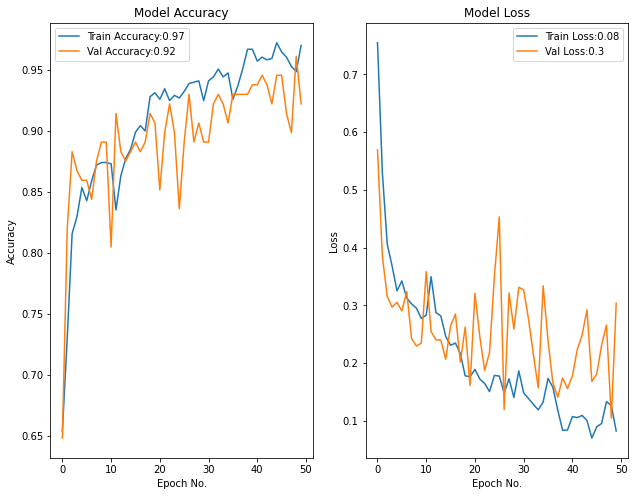

In [ ]:
plot_learning_curve(model_info)